In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("~/matplotlib.mplstyle")
plt.rcParams['font.family'] = 'cursive'

In [3]:
tg = pd.read_csv('../runs/abstract/tg_metrics.csv')
eg = pd.read_csv('../runs/abstract/eg_metrics.csv')
tg

,run,api,shots,F1,precision,recall,tokens
0,1,llm,0,0.657585,0.589345,0.743697,208122
1,1,nlp,0,0.620605,0.554576,0.704482,0
2,1,llm,1,0.674214,0.611872,0.750700,398186
3,1,nlp,1,0.620605,0.554576,0.704482,0
4,1,llm,2,0.653944,0.599068,0.719888,618384
5,1,nlp,2,0.620605,0.554576,0.704482,0
6,1,llm,3,0.680529,0.618557,0.756303,877130
7,1,nlp,3,0.620605,0.554576,0.704482,0
8,1,llm,4,0.619168,0.563073,0.687675,927282
9,1,nlp,4,0.620605,0.554576,0.704482,0


Save OK: abstract-f1-scores.svg


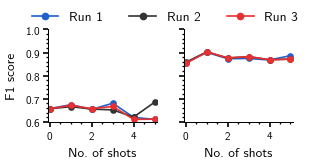

In [23]:
runs = tg.run.unique()

# Plot f-1 
outfile = "abstract-f1-scores.svg"

fig, axes = plt.subplots(1,2, sharey=True, figsize=(2.63, 1.0))

ax = axes[0]
for r in runs:
    mask = (tg.run == r) & (tg.api == 'llm')
    y_llm = tg[mask]['F1']
    x = tg[mask]['shots']
    ax.plot(x, y_llm, '.-', label="Run %d" %r)
ax.set(ylabel='F1 score', xlabel='No. of shots')
ax.legend(loc=(-0.2, 1.01), ncol=3)

ax = axes[1]
for r in runs:
    mask = (eg.run == r) & (eg.api == 'llm')
    y_llm = eg[mask]['F1']
    x = eg[mask]['shots']
    ax.plot(x, y_llm, '.-', label="Run %d" %r)

ax.set(xlabel='No. of shots', ylim=(0.6, 1.0))
plt.subplots_adjust(wspace=0.25)
# plt.tight_layout()
plt.savefig(outfile, dpi=600)
print("Save OK:", outfile)
plt.show()